In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import glob
import os
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn as sns
import plotly.express as px


In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "MAGISTERKA"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="jpg", resolution=400):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
eur_usd_1h = pd.read_csv('dane/EURUSD/eurusd_1h.csv', sep = ',')
sp500_1h = pd.read_csv('dane/SP500/sp500_1h.csv', sep = ',')

In [4]:
sp500_1h.describe()

,id,data_open,data_close,data_high,data_low,data_volume
count,7663.000000,7663.000000,7663.000000,7663.000000,7663.000000,7663.0
mean,15216.389795,4136.201152,4136.240010,4141.607138,4130.528083,0.0
std,20813.234137,245.338182,245.381064,243.929626,246.760889,0.0
min,1289.000000,3508.000000,3508.200000,3533.600000,3490.100000,0.0
25%,3275.500000,3960.850000,3960.900000,3966.700000,3954.400000,0.0
50%,5191.000000,4127.600000,4127.700000,4132.200000,4122.200000,0.0
75%,8983.500000,4357.550000,4357.800000,4361.150000,4352.800000,0.0
max,68834.000000,4602.500000,4602.100000,4606.900000,4598.300000,0.0


In [5]:
eur_usd_1h.describe()

,id,data_open,data_close,data_high,data_low,data_volume
count,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.0
mean,46857.601918,1.080851,1.080861,1.081536,1.080189,0.0
std,8615.280628,0.016661,0.016662,0.016658,0.016659,0.0
min,28851.000000,1.045260,1.045250,1.046610,1.044830,0.0
25%,41769.250000,1.068130,1.068142,1.068770,1.067485,0.0
50%,43098.500000,1.081730,1.081750,1.082530,1.081000,0.0
75%,44427.750000,1.092610,1.092630,1.093440,1.092002,0.0
max,68836.000000,1.125730,1.125740,1.127570,1.125040,0.0


In [30]:
eur_usd_1h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5318 entries, 0 to 5317
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5318 non-null   int64  
 1   name           5318 non-null   object 
 2   data_open      5318 non-null   float64
 3   data_close     5318 non-null   float64
 4   data_high      5318 non-null   float64
 5   data_low       5318 non-null   float64
 6   data_volume    5318 non-null   float64
 7   data_datetime  5318 non-null   object 
 8   timeframe      5318 non-null   object 
dtypes: float64(5), int64(1), object(3)
memory usage: 374.0+ KB


In [35]:
eur_usd_1h.sort_values(by=['data_datetime'])
eur_usd_1h

,id,name,data_open,data_close,data_high,data_low,data_volume,data_datetime,timeframe
0,40978,EURUSD,1.07075,1.07081,1.07187,1.06999,0.0,2023-02-15 07:00:00.000,1h
1,41003,EURUSD,1.07089,1.07070,1.07226,1.07008,0.0,2023-02-16 08:00:00.000,1h
2,41032,EURUSD,1.06206,1.06412,1.06440,1.06204,0.0,2023-02-17 13:00:00.000,1h
3,41057,EURUSD,1.06804,1.06888,1.06914,1.06784,0.0,2023-02-20 14:00:00.000,1h
4,41082,EURUSD,1.06487,1.06854,1.06983,1.06458,0.0,2023-02-21 15:00:00.000,1h
...,...,...,...,...,...,...,...,...,...
5313,67712,EURUSD,1.06960,1.07016,1.07051,1.06901,0.0,2023-11-13 18:00:00.000,1h
5314,67702,EURUSD,1.06991,1.06957,1.07061,1.06936,0.0,2023-11-13 17:00:00.000,1h
5315,67682,EURUSD,1.06730,1.06769,1.06801,1.06679,0.0,2023-11-13 14:00:00.000,1h
5316,67698,EURUSD,1.06888,1.06992,1.07038,1.06852,0.0,2023-11-13 16:00:00.000,1h


In [45]:
eur_usd_1h

,id,name,data_open,data_close,data_high,data_low,data_volume,data_datetime,timeframe
0,40978,EURUSD,1.07075,1.07081,1.07187,1.06999,0.0,2023-02-15 07:00:00.000,1h
1,41003,EURUSD,1.07089,1.07070,1.07226,1.07008,0.0,2023-02-16 08:00:00.000,1h
2,41032,EURUSD,1.06206,1.06412,1.06440,1.06204,0.0,2023-02-17 13:00:00.000,1h
3,41057,EURUSD,1.06804,1.06888,1.06914,1.06784,0.0,2023-02-20 14:00:00.000,1h
4,41082,EURUSD,1.06487,1.06854,1.06983,1.06458,0.0,2023-02-21 15:00:00.000,1h
...,...,...,...,...,...,...,...,...,...
5313,67712,EURUSD,1.06960,1.07016,1.07051,1.06901,0.0,2023-11-13 18:00:00.000,1h
5314,67702,EURUSD,1.06991,1.06957,1.07061,1.06936,0.0,2023-11-13 17:00:00.000,1h
5315,67682,EURUSD,1.06730,1.06769,1.06801,1.06679,0.0,2023-11-13 14:00:00.000,1h
5316,67698,EURUSD,1.06888,1.06992,1.07038,1.06852,0.0,2023-11-13 16:00:00.000,1h


# Ustaw 'data_datetime' jako indeks
eur_usd_1h.set_index('data_datetime', inplace=True)

# Narysuj wykres
plt.figure(figsize=(10, 6))
plt.plot(eur_usd_1h.index, eur_usd_1h['data_close'], marker='o')
plt.title('Wykres danych godzinowych')
plt.xlabel('Data i godzina')
plt.ylabel('Wartość')
plt.grid(True)
plt.show()


In [5]:
eur_usd_1h['Name'] = 'EURUSD'

In [4]:
sp500_1h['Name'] = 'SP500'

In [6]:
eur_usd_1h = eur_usd_1h.rename(columns={"data_open": "Open", "data_close": "Close", 'data_high': 'High', 'data_low': 'Low'})

In [ ]:
sp500_1h = sp500_1h.rename(columns={"data_open": "Open", "data_close": "Close", 'data_high': 'High', 'data_low': 'Low'})

In [7]:
price_data = eur_usd_1h
price_data.head()

,id,name,Open,Close,High,Low,data_volume,data_datetime,timeframe,Name
0,40978,EURUSD,1.07075,1.07081,1.07187,1.06999,0.0,2023-02-15 07:00:00.000,1h,EURUSD
1,41003,EURUSD,1.07089,1.07070,1.07226,1.07008,0.0,2023-02-16 08:00:00.000,1h,EURUSD
2,41032,EURUSD,1.06206,1.06412,1.06440,1.06204,0.0,2023-02-17 13:00:00.000,1h,EURUSD
3,41057,EURUSD,1.06804,1.06888,1.06914,1.06784,0.0,2023-02-20 14:00:00.000,1h,EURUSD
4,41082,EURUSD,1.06487,1.06854,1.06983,1.06458,0.0,2023-02-21 15:00:00.000,1h,EURUSD


## Return

In [8]:
# Identify rows where the symbol changes
mask = price_data['Name'] != price_data['Name'].shift(1)

# Calculate log return
price_data['Return'] = np.log(price_data['Close']) -  np.log(price_data['Close'].shift(1))

# For rows where symbol changes set null
price_data['Return'] = np.where(mask == True, np.nan, price_data['Return'])

## Gain/lose

In [9]:
# Set '0' if 'Up' is below 0
price_data['Up'] = price_data['Return']
price_data.loc[(price_data['Up']<0), 'Up'] = 0
 
# Set '0' if 'Down' above 0
price_data['Down'] = price_data['Return']
price_data.loc[(price_data['Down']>0), 'Down'] = 0 
 
# Set the absolute value for negative values
price_data['Down'] = abs(price_data['Down'])

## Average gain/loss

In [10]:
# 14-days averages
price_data['avg_14up'] = price_data.groupby('Name')['Up'].transform(lambda x: x.rolling(window=14).mean())
price_data['avg_14down'] = price_data.groupby('Name')['Down'].transform(lambda x: x.rolling(window=14).mean())

## RSI

 $RSI = 100 + \frac{100}{1-RS}$
 
$RS = \frac{Average \ Gain \ Over \ past \ 14 \ days}{Average \ Loss \ Over \ past \ 14 \ days}$

In [11]:
# Calculate RS

price_data['RS_14'] = price_data['avg_14up'] / price_data['avg_14down']

# Calculate RSI

price_data['RSI'] = 100 - (100/(1 + price_data['RS_14']))

## MA

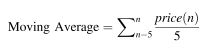

In [64]:
price_data["5MA"] = price_data.groupby('Name')['Close'].transform(lambda x: x.rolling(window = 5).mean())
price_data["15MA"] = price_data.groupby('Name')['Close'].transform(lambda x: x.rolling(window = 15).mean())

## Moving Average Convergence Divergence (MACD)

$ MACD = EMA_{12}(C_{t}) - EMA_{26}(C_{t}) $ 

   $ C_{t} = current \ close \ price $

In [65]:
# Calculate 12 and 26 EWM
price_data['12Ewm'] = price_data.groupby('Name')['Close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
price_data['26Ewm'] = price_data.groupby('Name')['Close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())

# Calculate MACD
price_data['MACD'] = price_data['12Ewm'] - price_data['26Ewm']

## Stochastic Oscillator
   $ K = 100 * \frac{C_{t}-L_{14}}{H_{14}-L_{14}} $
    
   $ C_{t} = current \ close \ price $

In [66]:
# Period
n = 14

# Group by the symbol and then take max and min 
price_data['low_14'] = price_data.groupby('Name')['Low'].transform(lambda x: x.rolling(window = n).min())
price_data['high_14'] = price_data.groupby('Name')['High'].transform(lambda x: x.rolling(window = n).max())

# Calculate the stochastic oscillator
price_data['k_percent']  = 100 * ((price_data['Close'] - price_data['low_14']) / (price_data['high_14'] - price_data['low_14']))

In [67]:
price_data

,id,name,Open,Close,High,Low,data_volume,data_datetime,timeframe,Name,...,RS_14,RSI,5MA,15MA,12Ewm,26Ewm,MACD,low_14,high_14,k_percent
0,40978,EURUSD,1.07075,1.07081,1.07187,1.06999,0.0,2023-02-15 07:00:00.000,1h,EURUSD,...,NaN,NaN,NaN,NaN,1.070810,1.070810,0.000000,NaN,NaN,NaN
1,41003,EURUSD,1.07089,1.07070,1.07226,1.07008,0.0,2023-02-16 08:00:00.000,1h,EURUSD,...,NaN,NaN,NaN,NaN,1.070793,1.070802,-0.000009,NaN,NaN,NaN
2,41032,EURUSD,1.06206,1.06412,1.06440,1.06204,0.0,2023-02-17 13:00:00.000,1h,EURUSD,...,NaN,NaN,NaN,NaN,1.069766,1.070307,-0.000540,NaN,NaN,NaN
3,41057,EURUSD,1.06804,1.06888,1.06914,1.06784,0.0,2023-02-20 14:00:00.000,1h,EURUSD,...,NaN,NaN,NaN,NaN,1.069630,1.070201,-0.000571,NaN,NaN,NaN
4,41082,EURUSD,1.06487,1.06854,1.06983,1.06458,0.0,2023-02-21 15:00:00.000,1h,EURUSD,...,NaN,NaN,1.068610,NaN,1.069462,1.070078,-0.000616,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,67712,EURUSD,1.06960,1.07016,1.07051,1.06901,0.0,2023-11-13 18:00:00.000,1h,EURUSD,...,1.171287,53.944370,1.068754,1.068834,1.069131,1.069200,-0.000069,1.06651,1.07058,89.680590
5314,67702,EURUSD,1.06991,1.06957,1.07061,1.06936,0.0,2023-11-13 17:00:00.000,1h,EURUSD,...,1.252548,55.605827,1.069208,1.068855,1.069198,1.069227,-0.000029,1.06651,1.07061,74.634146
5315,67682,EURUSD,1.06730,1.06769,1.06801,1.06679,0.0,2023-11-13 14:00:00.000,1h,EURUSD,...,0.870308,46.532875,1.069292,1.068812,1.068966,1.069114,-0.000147,1.06651,1.07061,28.780488
5316,67698,EURUSD,1.06888,1.06992,1.07038,1.06852,0.0,2023-11-13 16:00:00.000,1h,EURUSD,...,1.113331,52.681342,1.069240,1.068902,1.069113,1.069173,-0.000060,1.06651,1.07061,83.170732


##  Bollinger Bands

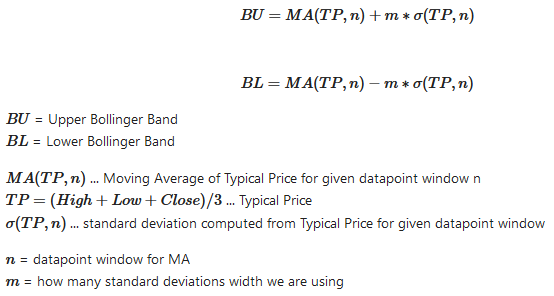

https://tcoil.info/compute-bollinger-bands-for-stocks-with-python-and-pandas/

In [68]:
def bollinger_bands(df, n, m):
    result = df.copy()  
    
    # Initialize new columns with NaN values
    result['B_MA'] = np.nan
    result['BU'] = np.nan
    result['BL'] = np.nan
    
    grouped = df.groupby('Name')
    
    for name, group in grouped:
        data = group['Close']
        
        B_MA = data.rolling(n, min_periods=n).mean()
        sigma = data.rolling(n, min_periods=n).std()
        
        BU = B_MA + m * sigma
        BL = B_MA - m * sigma
        
        # Assign calculated values to the corresponding rows in the result DataFrame
        result.loc[group.index, 'B_MA'] = B_MA
        result.loc[group.index, 'BU'] = BU
        result.loc[group.index, 'BL'] = BL
    
    return result


In [69]:
n = 15   # datapoint rolling window
m = 2    # sigma width
df = bollinger_bands(price_data, 20, 2)

In [70]:
df.head(20)

,id,name,Open,Close,High,Low,data_volume,data_datetime,timeframe,Name,...,15MA,12Ewm,26Ewm,MACD,low_14,high_14,k_percent,B_MA,BU,BL
0,40978,EURUSD,1.07075,1.07081,1.07187,1.06999,0.0,2023-02-15 07:00:00.000,1h,EURUSD,...,NaN,1.070810,1.070810,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,41003,EURUSD,1.07089,1.07070,1.07226,1.07008,0.0,2023-02-16 08:00:00.000,1h,EURUSD,...,NaN,1.070793,1.070802,-0.000009,NaN,NaN,NaN,NaN,NaN,NaN
2,41032,EURUSD,1.06206,1.06412,1.06440,1.06204,0.0,2023-02-17 13:00:00.000,1h,EURUSD,...,NaN,1.069766,1.070307,-0.000540,NaN,NaN,NaN,NaN,NaN,NaN
3,41057,EURUSD,1.06804,1.06888,1.06914,1.06784,0.0,2023-02-20 14:00:00.000,1h,EURUSD,...,NaN,1.069630,1.070201,-0.000571,NaN,NaN,NaN,NaN,NaN,NaN
4,41082,EURUSD,1.06487,1.06854,1.06983,1.06458,0.0,2023-02-21 15:00:00.000,1h,EURUSD,...,NaN,1.069462,1.070078,-0.000616,NaN,NaN,NaN,NaN,NaN,NaN
5,41112,EURUSD,1.06026,1.06049,1.06055,1.06013,0.0,2023-02-22 21:00:00.000,1h,EURUSD,...,NaN,1.068082,1.069368,-0.001286,NaN,NaN,NaN,NaN,NaN,NaN
6,41116,EURUSD,1.06117,1.06197,1.06218,1.06110,0.0,2023-02-23 01:00:00.000,1h,EURUSD,...,NaN,1.067142,1.068820,-0.001678,NaN,NaN,NaN,NaN,NaN,NaN
7,41162,EURUSD,1.05464,1.05534,1.05554,1.05456,0.0,2023-02-26 23:00:00.000,1h,EURUSD,...,NaN,1.065326,1.067821,-0.002495,NaN,NaN,NaN,NaN,NaN,NaN
8,41192,EURUSD,1.05902,1.05846,1.05907,1.05820,0.0,2023-02-28 05:00:00.000,1h,EURUSD,...,NaN,1.064270,1.067128,-0.002858,NaN,NaN,NaN,NaN,NaN,NaN
9,41217,EURUSD,1.05909,1.06072,1.06148,1.05893,0.0,2023-03-01 06:00:00.000,1h,EURUSD,...,NaN,1.063724,1.066653,-0.002930,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
print('Before NaN Drop we have {} rows and {} columns'.format(df.shape[0], df.shape[1]))

# Delete lines with NaN values
df = df.dropna()

# Display how much we have left now
print('After NaN Drop we have {} rows and {} columns'.format(df.shape[0], df.shape[1]))

# price_data.head()

Before NaN Drop we have 5318 rows and 28 columns
After NaN Drop we have 5299 rows and 28 columns


In [72]:
df

,id,name,Open,Close,High,Low,data_volume,data_datetime,timeframe,Name,...,15MA,12Ewm,26Ewm,MACD,low_14,high_14,k_percent,B_MA,BU,BL
19,41482,EURUSD,1.06074,1.06056,1.06083,1.05995,0.0,2023-03-16 06:00:00.000,1h,EURUSD,...,1.062542,1.064645,1.065467,-0.000822,1.05425,1.07463,30.961727,1.064059,1.075502,1.052616
20,41512,EURUSD,1.06297,1.06262,1.06334,1.06122,0.0,2023-03-17 12:00:00.000,1h,EURUSD,...,1.062684,1.064334,1.065256,-0.000922,1.05425,1.07463,41.069676,1.063649,1.074653,1.052646
21,41537,EURUSD,1.07050,1.07238,1.07308,1.07030,0.0,2023-03-20 13:00:00.000,1h,EURUSD,...,1.063378,1.065572,1.065784,-0.000212,1.05425,1.07463,88.959764,1.063734,1.074986,1.052481
22,41562,EURUSD,1.07777,1.07741,1.07798,1.07608,0.0,2023-03-21 14:00:00.000,1h,EURUSD,...,1.064849,1.067393,1.066645,0.000748,1.05425,1.07798,97.597977,1.064398,1.077209,1.051587
23,41592,EURUSD,1.08650,1.08551,1.08655,1.08546,0.0,2023-03-22 20:00:00.000,1h,EURUSD,...,1.066653,1.070180,1.068042,0.002138,1.05425,1.08655,96.780186,1.065230,1.081066,1.049393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5313,67712,EURUSD,1.06960,1.07016,1.07051,1.06901,0.0,2023-11-13 18:00:00.000,1h,EURUSD,...,1.068834,1.069131,1.069200,-0.000069,1.06651,1.07058,89.680590,1.069726,1.078503,1.060949
5314,67702,EURUSD,1.06991,1.06957,1.07061,1.06936,0.0,2023-11-13 17:00:00.000,1h,EURUSD,...,1.068855,1.069198,1.069227,-0.000029,1.06651,1.07061,74.634146,1.069785,1.078540,1.061030
5315,67682,EURUSD,1.06730,1.06769,1.06801,1.06679,0.0,2023-11-13 14:00:00.000,1h,EURUSD,...,1.068812,1.068966,1.069114,-0.000147,1.06651,1.07061,28.780488,1.069747,1.078533,1.060960
5316,67698,EURUSD,1.06888,1.06992,1.07038,1.06852,0.0,2023-11-13 16:00:00.000,1h,EURUSD,...,1.068902,1.069113,1.069173,-0.000060,1.06651,1.07061,83.170732,1.069823,1.078586,1.061060


### Plot Bollinger Bands

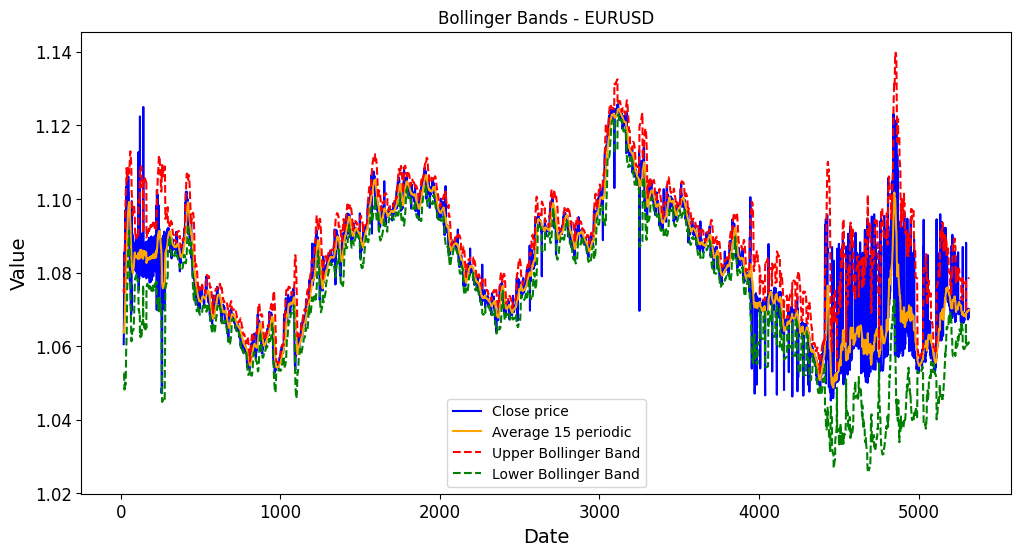

In [73]:
grouped = df.groupby('Name')

for name, group in grouped:
    plt.figure(figsize=(12, 6))
    plt.title(f'Bollinger Bands - {name}')
    
    plt.plot(group.index, group['Close'], label='Close price', color='blue') 
    plt.plot(group.index, group['B_MA'], label=f'Average {n} periodic', color='orange')  
    plt.plot(group.index, group['BU'], label=f'Upper Bollinger Band', color='red', linestyle='--') 
    plt.plot(group.index, group['BL'], label=f'Lower Bollinger Band', color='green', linestyle='--') 
   
    plt.legend()  
    plt.xlabel('Date') 
    plt.ylabel('Value') 
    plt.show()


In [74]:
df.to_csv("indicators_eurusd_1h.csv", index=False, encoding='utf-8-sig')

In [3]:
#df = pd.read_csv('indicators_data.csv')

In [23]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Name,Return,Up,...,15MA,12Ewm,26Ewm,MACD,low_14,high_14,k_percent,B_MA,BU,BL
19,2021-11-19,19.139999,19.440001,18.940001,19.280001,19.280001,31259800,AAL,-0.005689,0.000000,...,20.604667,20.153076,20.067555,0.085522,18.940001,22.350000,9.970679,20.2555,22.388474,18.122526
20,2021-11-22,19.559999,19.760000,19.049999,19.629999,19.629999,33220600,AAL,0.017991,0.017991,...,20.595333,20.072603,20.035143,0.037460,18.940001,22.350000,20.234565,20.2755,22.375229,18.175771
21,2021-11-23,19.750000,20.139999,19.320000,19.469999,19.469999,30427300,AAL,-0.008184,0.000000,...,20.571333,19.979895,19.993281,-0.013386,18.940001,22.350000,15.542487,20.2795,22.372420,18.186580
22,2021-11-24,19.330000,19.549999,19.070000,19.459999,19.459999,21323300,AAL,-0.000514,0.000000,...,20.493333,19.899911,19.953778,-0.053868,18.940001,22.350000,15.249225,20.3010,22.348210,18.253790
23,2021-11-26,18.270000,18.270000,16.900000,17.750000,17.750000,84177500,AAL,-0.091976,0.000000,...,20.301333,19.569155,19.790535,-0.221380,16.900000,22.350000,15.596335,20.2290,22.526696,17.931304
24,2021-11-29,18.150000,18.260000,17.420000,17.740000,17.740000,42940300,AAL,-0.000564,0.000000,...,20.029333,19.287747,19.638644,-0.350897,16.900000,22.330000,15.469615,20.1560,22.673596,17.638404
25,2021-11-30,17.440001,17.740000,16.920000,17.690001,17.690001,49870100,AAL,-0.002822,0.000000,...,19.725333,19.041940,19.494300,-0.452360,16.900000,22.030001,15.399625,20.0520,22.798202,17.305798
26,2021-12-01,17.940001,18.240000,16.260000,16.280001,16.280001,82030100,AAL,-0.083062,0.000000,...,19.326667,18.617026,19.256204,-0.639178,16.260000,21.790001,0.361672,19.8745,23.098466,16.650534
27,2021-12-02,16.490000,17.440001,16.150000,17.420000,17.420000,58808900,AAL,0.067682,0.067682,...,19.050000,18.432868,19.120189,-0.687321,16.150000,21.360001,24.376204,19.7140,23.095369,16.332631
28,2021-12-03,17.270000,17.290001,16.340000,16.620001,16.620001,57884000,AAL,-0.047012,0.000000,...,18.736000,18.153965,18.934990,-0.781024,16.150000,20.570000,10.633512,19.5135,23.133318,15.893682
